### Libraries

In [115]:
# Get libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from pycaret.classification import *
from pycaret.regression import *
from scipy.stats import chi2_contingency

### Data

In [6]:
# Get data
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
df.shape

(344, 7)

In [130]:
# df.info()

### Relationships between variables

#### General

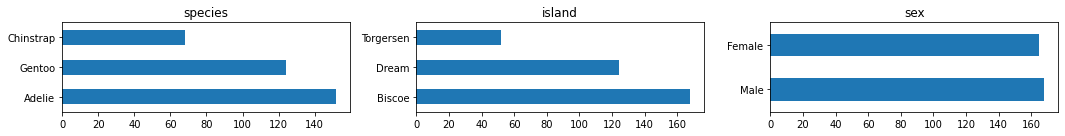

In [21]:
# Plot categorical variables
fig = plt.figure(figsize=(15,2))
ax1 = fig.add_subplot(131)
df["species"].value_counts().plot(kind="barh")
ax1.set_title("species")
ax2 = fig.add_subplot(132)
df["island"].value_counts().plot(kind="barh")
ax2.set_title("island")
ax3 = fig.add_subplot(133)
df["sex"].value_counts().plot(kind="barh")
ax3.set_title("sex")
plt.tight_layout()

##### Co-occourrence

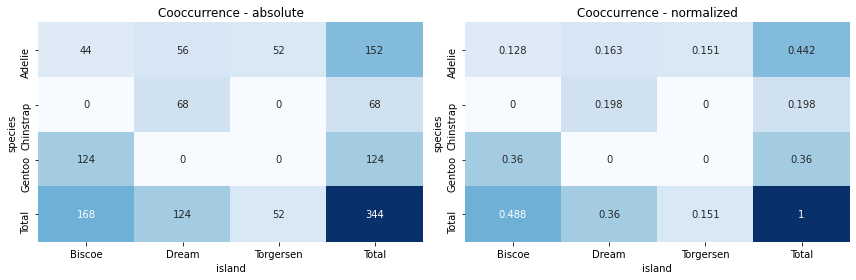

In [91]:
# Cooccurrence
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
sns.heatmap(pd.crosstab(
    df["species"],
    df["island"],
    normalize=False,
    margins=True,
    margins_name="Total",
),cmap="Blues", annot=True, cbar=False, fmt="g")
ax1.set_title("Cooccurrence - absolute")

ax2 = fig.add_subplot(122)
sns.heatmap(pd.crosstab(
    df["species"],
    df["island"],
    normalize=True,
    margins=True,
    margins_name="Total",
),cmap="Blues", annot=True, cbar=False, fmt=".3g")
ax2.set_title("Cooccurrence - normalized")

plt.tight_layout()

##### Chi^2 test for independence

In [128]:
contingency_table = pd.crosstab(df["species"], df["island"])
contingency_table

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,56,52
Chinstrap,0,68,0
Gentoo,124,0,0


In [129]:
stat, p, dof, expected = chi2_contingency(contingency_table)
# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

p value is 1.3545738297192517e-63
Dependent (reject H0)


##### Correlation

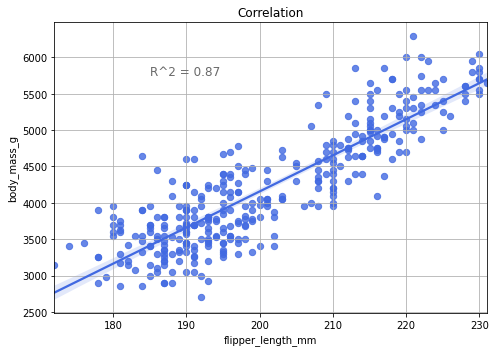

In [76]:
# Correlation
r_2 = df[["flipper_length_mm", "body_mass_g"]].corr().iloc[0][1]

fig = plt.figure(figsize=(7,5))
fig.add_subplot(111)
p1 = sns.regplot(data=df, x="flipper_length_mm", y="body_mass_g", fit_reg=True, marker="o", color="royalblue", scatter_kws={'s':40})
p1.text(185, 5750, f"R^2 = {r_2:.2f}", horizontalalignment='left', size='large', color='dimgray', weight='normal')
plt.grid()
plt.title("Correlation")
plt.tight_layout()

In [116]:
# Chi^2 for independence

#### Machine learning

##### Given flipper_length_mm can we predict body_mass_g?

In [107]:
reg1 = setup(df[["flipper_length_mm", "body_mass_g"]], target='body_mass_g', session_id=123, log_experiment=True, experiment_name='regression_test')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(344, 2)"
4,Missing Values,True
5,Numeric Features,1
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [108]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Huber Regressor,302.1986,144228.8038,379.1295,0.7593,0.0937,0.0741,0.0144
1,Least Angle Regression,304.6896,144392.8900,379.4547,0.7586,0.0940,0.0752,0.0044
2,Linear Regression,304.6896,144392.8900,379.4547,0.7586,0.0940,0.0752,0.0026
3,Bayesian Ridge,304.7033,144403.3945,379.4670,0.7586,0.0940,0.0752,0.0030
4,Orthogonal Matching Pursuit,304.6896,144392.8900,379.4547,0.7586,0.0940,0.0752,0.0032
5,Random Sample Consensus,302.5161,144925.2016,379.9349,0.7586,0.0935,0.0740,0.0526
6,Elastic Net,304.7106,144407.8372,379.4716,0.7586,0.0940,0.0752,0.0034
7,Ridge Regression,304.6898,144393.0078,379.4548,0.7586,0.0940,0.0752,0.0024
8,Lasso Regression,304.6905,144393.4647,379.4553,0.7586,0.0940,0.0752,0.0040
9,Lasso Least Angle Regression,304.8598,144695.5175,379.8285,0.7583,0.0939,0.0753,0.0038


In [109]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [110]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,273.3971,121137.7099,348.0484,0.8389,0.0802,0.0634
1,307.7456,163125.7357,403.8883,0.7368,0.1018,0.0786
2,332.2923,168450.7255,410.4275,0.6073,0.1017,0.0781
3,245.4378,114364.0207,338.1775,0.7960,0.0850,0.0587
4,342.8859,171914.0920,414.6252,0.7340,0.0941,0.0791
5,342.6131,175219.6015,418.5924,0.7681,0.1015,0.0821
6,315.4099,134755.0851,367.0900,0.6725,0.0943,0.0821
7,289.9839,130386.9565,361.0913,0.7892,0.0989,0.0807
8,299.6192,138242.9581,371.8104,0.7959,0.0902,0.0736
9,295.7078,119638.9954,345.8887,0.7703,0.0885,0.0757


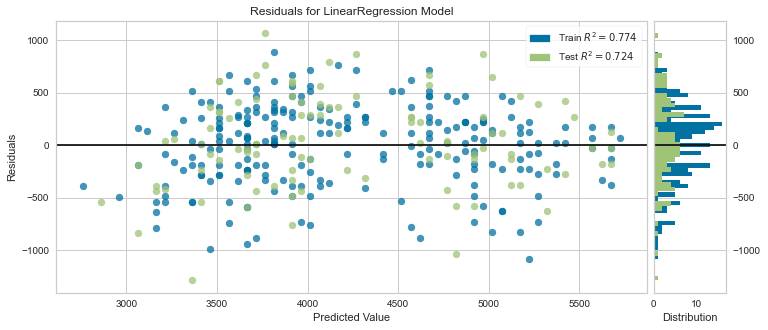

In [113]:
fig = plt.figure(figsize=(12,5))
fig.add_subplot(111)
plot_model(lr)

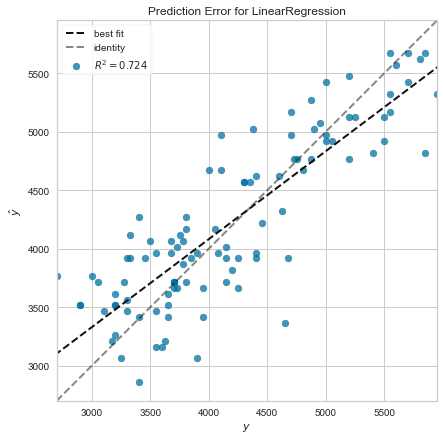

In [114]:
fig = plt.figure(figsize=(7,7))
fig.add_subplot(111)
plot_model(lr, plot='error')

##### Given the island, can we predict the species?

In [95]:
clf1 = setup(df[["island", "species"]], target='species', session_id=42, log_experiment=True, experiment_name='corr_test')

Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Multiclass
2,Label Encoded,"Adelie: 0, Chinstrap: 1, Gentoo: 2"
3,Original Data,"(344, 2)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [96]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.7167,0.0000,0.7858,0.8269,0.6787,0.5870,0.6461,0.0105
1,Naive Bayes,0.7167,0.0000,0.7858,0.8269,0.6787,0.5870,0.6461,0.0037
2,Decision Tree Classifier,0.7167,0.0000,0.7858,0.8269,0.6787,0.5870,0.6461,0.0037
3,Ridge Classifier,0.7167,0.0000,0.7858,0.8269,0.6787,0.5870,0.6461,0.0042
4,Random Forest Classifier,0.7167,0.0000,0.7858,0.8269,0.6787,0.5870,0.6461,0.1134
5,Ada Boost Classifier,0.7167,0.0000,0.7858,0.8269,0.6787,0.5870,0.6461,0.0631
6,Gradient Boosting Classifier,0.7167,0.0000,0.7858,0.8269,0.6787,0.5870,0.6461,0.1597
7,Linear Discriminant Analysis,0.7167,0.0000,0.7858,0.8269,0.6787,0.5870,0.6461,0.0046
8,Extra Trees Classifier,0.7167,0.0000,0.7858,0.8269,0.6787,0.5870,0.6461,0.1518
9,Extreme Gradient Boosting,0.7167,0.0000,0.7858,0.8269,0.6787,0.5870,0.6461,0.0511


In [97]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6250,0.0000,0.7273,0.8062,0.5577,0.4680,0.5545
1,0.7083,0.0000,0.7879,0.8132,0.6725,0.5659,0.6259
2,0.7500,0.0000,0.8182,0.8699,0.7443,0.6354,0.6897
3,0.6250,0.0000,0.7273,0.7847,0.5466,0.4706,0.5541
4,0.7917,0.0000,0.8485,0.8496,0.7778,0.6899,0.7256
5,0.7917,0.0000,0.8485,0.8496,0.7778,0.6899,0.7256
6,0.7500,0.0000,0.8000,0.8583,0.7322,0.6364,0.6905
7,0.7083,0.0000,0.7667,0.8065,0.6594,0.5681,0.6287
8,0.6667,0.0000,0.7333,0.7920,0.5945,0.5127,0.5852
9,0.7500,0.0000,0.8000,0.8392,0.7244,0.6327,0.6814


In [98]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6250,0.0000,0.7273,0.8062,0.5577,0.4680,0.5545
1,0.7083,0.0000,0.7879,0.8132,0.6725,0.5659,0.6259
2,0.7500,0.0000,0.8182,0.8699,0.7443,0.6354,0.6897
3,0.6250,0.0000,0.7273,0.7847,0.5466,0.4706,0.5541
4,0.7917,0.0000,0.8485,0.8496,0.7778,0.6899,0.7256
5,0.7917,0.0000,0.8485,0.8496,0.7778,0.6899,0.7256
6,0.7500,0.0000,0.8000,0.8583,0.7322,0.6364,0.6905
7,0.7083,0.0000,0.7667,0.8065,0.6594,0.5681,0.6287
8,0.6667,0.0000,0.7333,0.7920,0.5945,0.5127,0.5852
9,0.7500,0.0000,0.8000,0.8392,0.7244,0.6327,0.6814


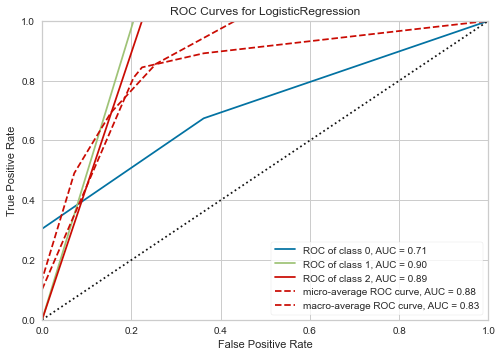

In [99]:
plot_model(lr)

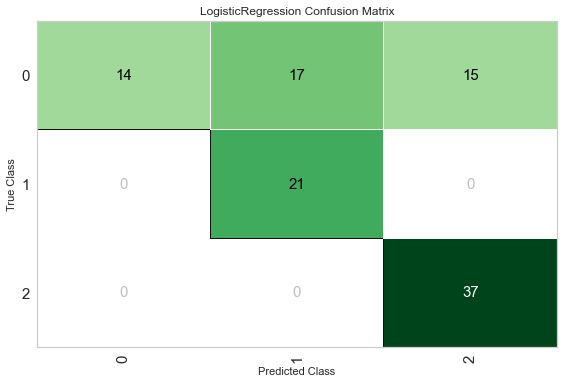

In [100]:
plot_model(lr, plot = 'confusion_matrix')

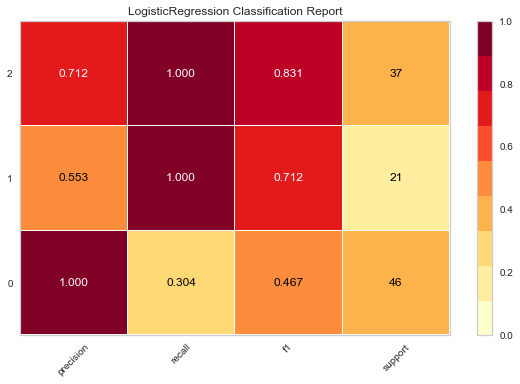

In [101]:
plot_model(lr, plot = 'class_report')

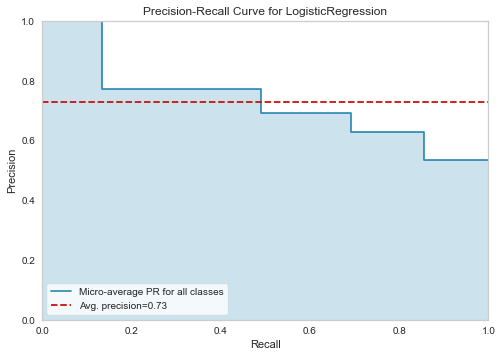

In [103]:
plot_model(lr, plot = 'pr')